In [1]:
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


This final project will analyze a Starbucks data set from TidyTuesday and investigate the sodium, caffeine, and calorie content of the  ubiquitous coffee chain. First, the data needs to be loaded from the TidyTuesday GitHub using the function 'read_csv' and then I like to use the head function to get an idea of the data and see most (if not all) of the columns. Next, I want to see the distribution of the caffeine content. To create an ecdf chart I first need to manipulate the data. Using the mutate function, I'll manipulate the data so that the calories are ranked from highest to lowest. Then, I'll divide that rank by the row number, n. This will give me a data set where each row has a new y-position value going from 0 to 1, where 1 is the highest calories and 0 is the lowest. However, I like to double check my new data set by using the head function again. I can see that I have successfully created a new column called 'ypos' and have selected a smaller number of variables. Then I'll create my ecdf chart with ggplot

In [2]:
starbucks = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-12-21/starbucks.csv',
                    col_types = cols())

In [3]:
starbucks |> head()

product_name,size,milk,whip,serv_size_m_l,calories,total_fat_g,saturated_fat_g,trans_fat_g,cholesterol_mg,sodium_mg,total_carbs_g,fiber_g,sugar_g,caffeine_mg
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
brewed coffee - dark roast,short,0,0,236,3,0.1,0,0,0,5,0,0,0,130
brewed coffee - dark roast,tall,0,0,354,4,0.1,0,0,0,10,0,0,0,193
brewed coffee - dark roast,grande,0,0,473,5,0.1,0,0,0,10,0,0,0,260
brewed coffee - dark roast,venti,0,0,591,5,0.1,0,0,0,10,0,0,0,340
brewed coffee - decaf pike place roast,short,0,0,236,3,0.1,0,0,0,5,0,0,0,15
brewed coffee - decaf pike place roast,tall,0,0,354,4,0.1,0,0,0,10,0,0,0,20


In [5]:
starbucks_ranked = starbucks |>    
    mutate(ypos = rank(calories, ties.method = 'first') / n()) |>    
    select(product_name, calories, ypos) |>   
    arrange(desc(ypos))

starbucks_ranked |> head()

product_name,calories,ypos
<chr>,<dbl>,<dbl>
White Hot Chocolate,640,1.0000000
Iced White Chocolate Mocha,630,0.9991282
White Chocolate Mocha,620,0.9982563
Java Chip Frappuccino Blended,600,0.9973845
Iced White Chocolate Mocha,600,0.9965126
White Hot Chocolate,590,0.9956408


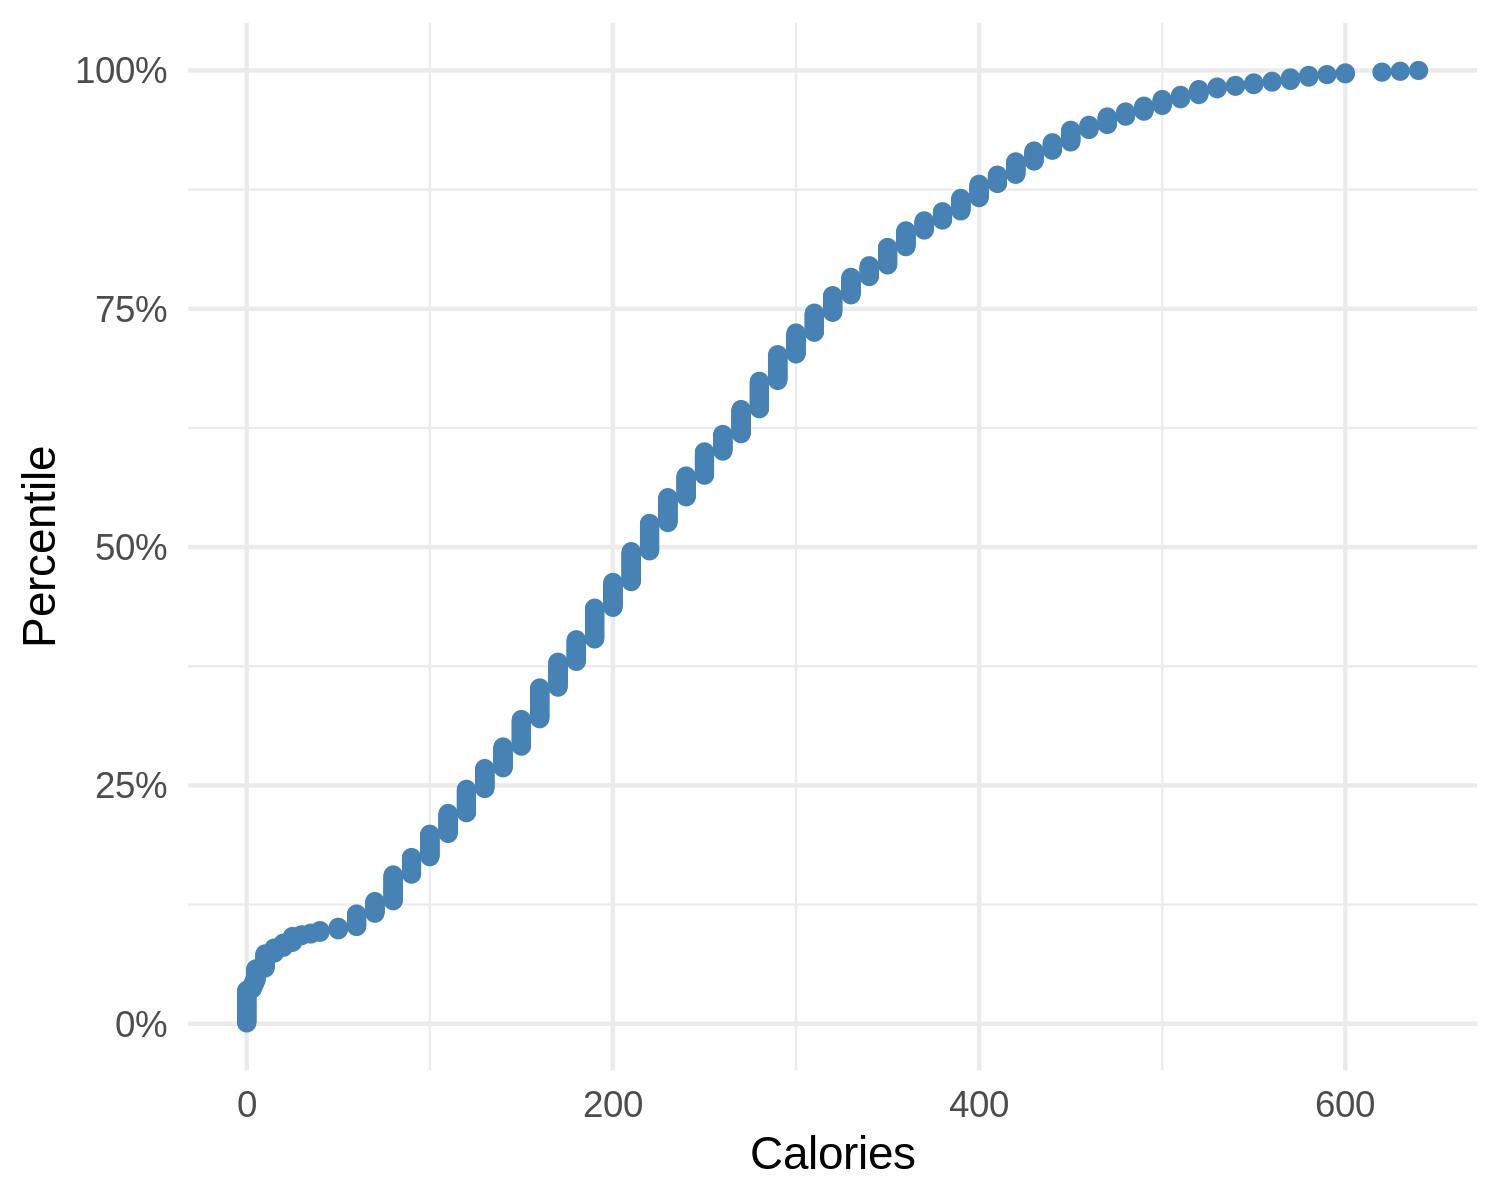

In [7]:
p = ggplot(starbucks_ranked, aes(x = calories, y = ypos)) +
    geom_point(color = 'steelblue') +   
    theme_minimal() +   
    xlab('Calories') +    
    ylab('Percentile') +  
    scale_y_continuous(labels = scales:: percent_format())

p

From this, we can see that the median calories in a Starbucks drink is a little over 200 calories. Next, I want to look at the caffeine content. However, there are a lot of duplicate product names in the data set given that each drink can be made with different types of milk and with different sized cups, but I want to get rid of the duplicates. To do this, I take advantage of the filter function. After that, I plot the calorie and caffeine content to see if there is a correlation by using a linear regression using the geom_smooth function. There seems to be a very slight negative correlation between caffeine content and calories.

In [9]:
sbucks = starbucks |>    
    filter(calories > 0 &          
    caffeine_mg > 0 &     
    size == 'grande' &       
    milk == 2 &
    whip == 0)

`geom_smooth()` using formula = 'y ~ x'


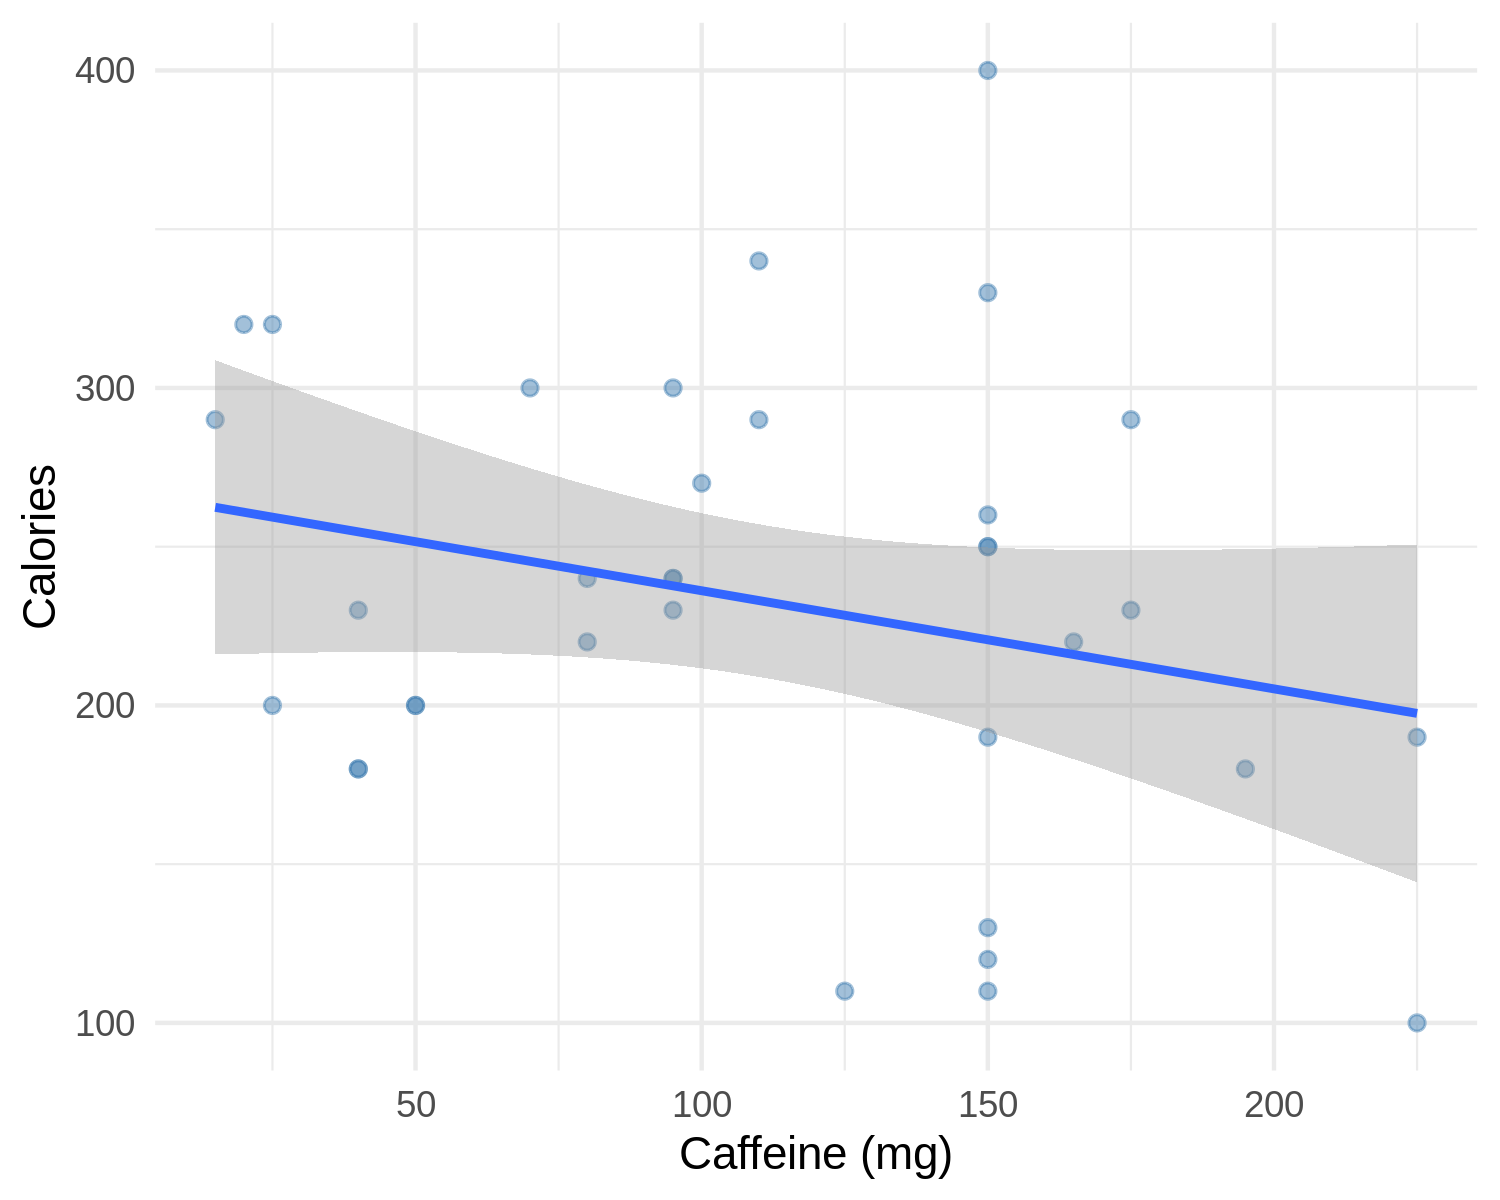

In [10]:
p = ggplot(sbucks, aes(x = caffeine_mg, y = calories)) +
    geom_point(color = 'steelblue', alpha = 0.5) +   
    geom_smooth(method = 'lm') +
    theme_minimal() + 
    xlab('Caffeine (mg)') +   
    ylab('Calories') +
    theme(legend.position = 'None')

p

Finally, I want to look at the sugar content of the Starbucks drinks. I'll use the same data set that I removed duplicates from previously. However, I also want to mutate the product names to make them a factor and sort in descending order by sugar content. After mutating the data, I can plot as a bar graph and see that frappacinos have the highest sugar content.

In [11]:
sbucks_product = starbucks |> 
filter(product_name != "Iced Caffè Mocha") |>
filter(calories > 0 & 
    caffeine_mg > 0 &           
    size == 'grande' &           
    milk == 2 &        
    whip == 0 ) |>  
    mutate(product = fct_reorder(product_name, sugar_g)) |>  
arrange(desc(sugar_g))

sbucks_product |> head()

product_name,size,milk,whip,serv_size_m_l,calories,total_fat_g,saturated_fat_g,trans_fat_g,cholesterol_mg,sodium_mg,total_carbs_g,fiber_g,sugar_g,caffeine_mg,product
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<fct>
Caffè Vanilla Frappuccino Blended,grande,2,0,473,300,2,1.0,0.1,10,220,68,0,67,95,Caffè Vanilla Frappuccino Blended
Java Chip Frappuccino Blended,grande,2,0,473,340,6,4.5,0.1,10,260,58,2,63,110,Java Chip Frappuccino Blended
Green Tea Crème Frappuccino Blended,grande,2,0,473,300,3,1.5,0.1,10,230,64,1,63,70,Green Tea Crème Frappuccino Blended
Caramel Frappuccino Blended,grande,2,0,473,270,2,1.5,0.1,10,230,60,0,60,100,Caramel Frappuccino Blended
White Chocolate Mocha,grande,2,0,473,400,11,7.0,0.2,30,240,60,0,58,150,White Chocolate Mocha
Iced White Chocolate Mocha,grande,2,0,473,330,9,6.0,0.1,20,180,54,0,52,150,Iced White Chocolate Mocha


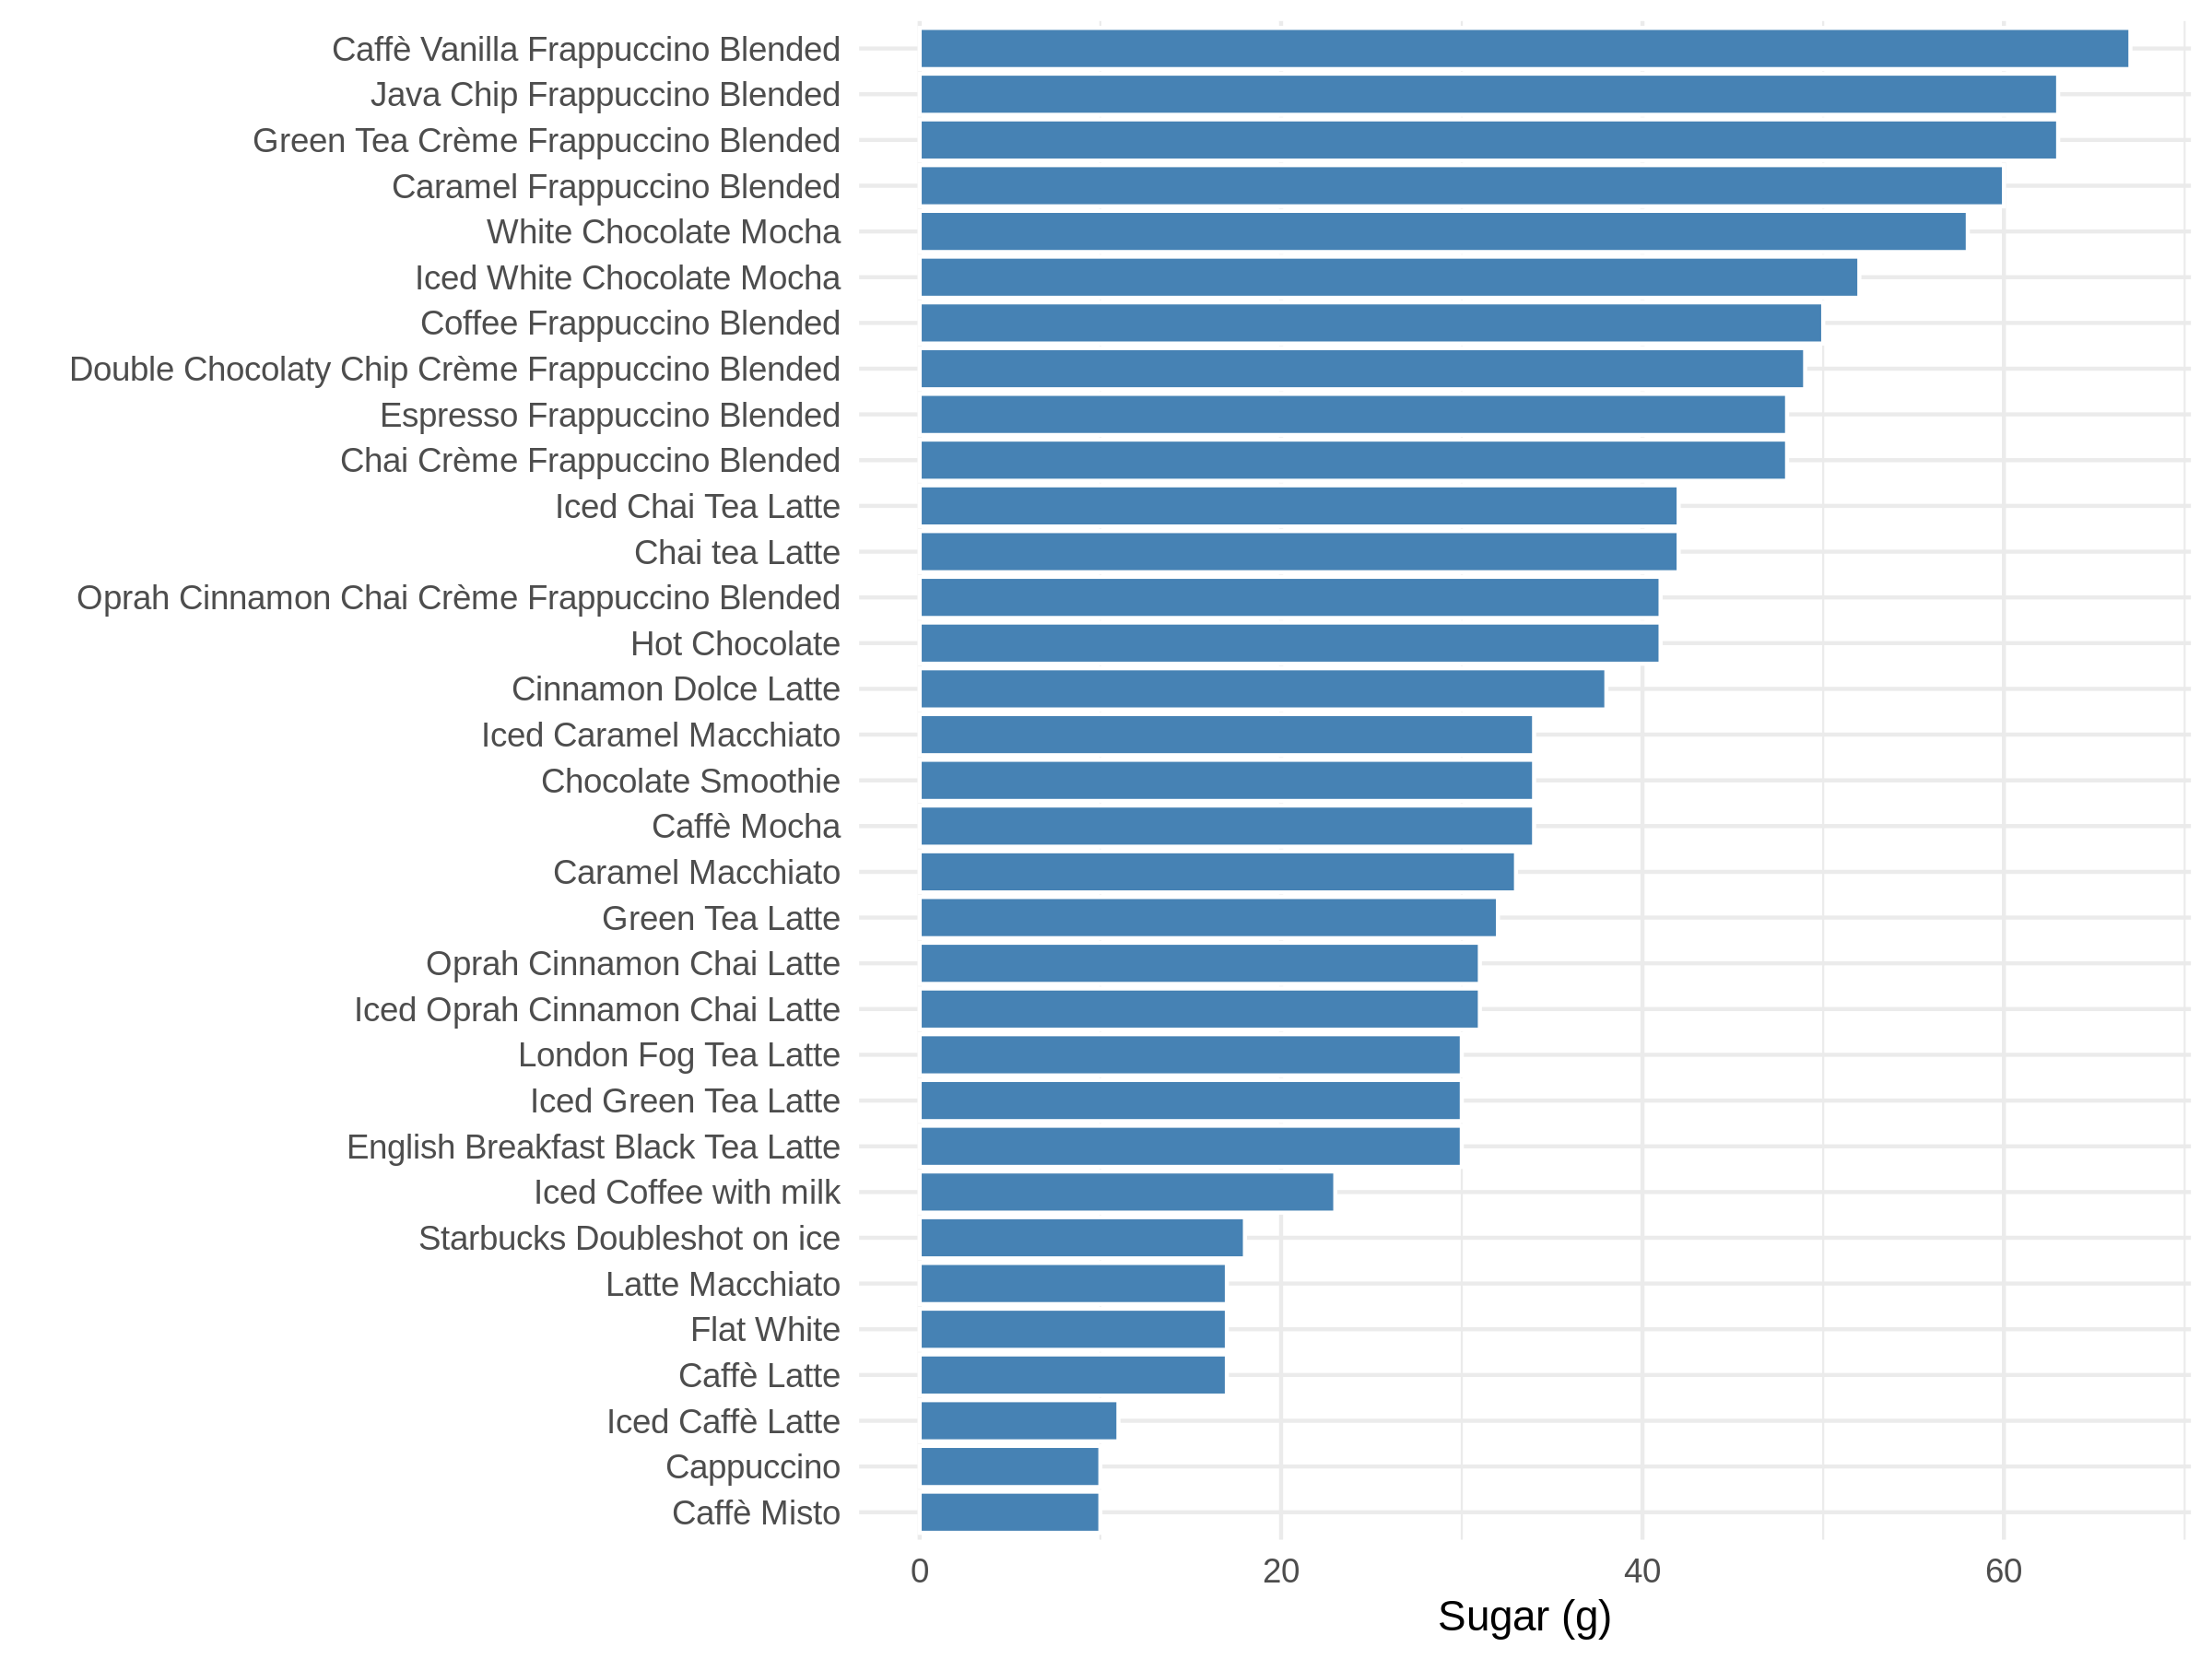

In [13]:
options(repr.plot.width=8, repr.plot.height=6, repr.plot.res = 300)

p = ggplot(sbucks_product, aes(x = sugar_g, y = product)) +
    geom_col(color = 'white', fill = 'steelblue') +
    theme_minimal() +
    xlab('Sugar (g)') +
    ylab('')

p